In [1]:
!pip install accelerate
!pip install datasets
from datasets import load_dataset
# !pip install evaluate
!pip install transformers
# !pip install git+https://github.com/huggingface/transformers
import numpy as np
import torch
import matplotlib.pyplot as plt
import functools
import pickle
np.random.seed(2024)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.4/297.4 kB 2.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [2]:
# Modified code below to move model out of function
# from transformers import DistilBertModel, DistilBertTokenizer, DistilBertConfig
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

from transformers import BertModel, BertConfig, BertTokenizer

model_name = "huawei-noah/TinyBERT_General_4L_312D"
config = BertConfig.from_pretrained(model_name)#, output_hidden_states=True, output_attentions=True)
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name, config=config)

# torch.save(model, 'models/base')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/409 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/62.7M [00:00<?, ?B/s]

In [3]:
model.save_pretrained('models/base')
tokenizer.save_pretrained('models/base')
config.save_pretrained('models/base')
# tokenizer = BertTokenizer.from_pretrained('./saved_model/')

In [11]:
# TESTING LOADING MODEL
model = BertModel.from_pretrained('models/base', config=config)

In [4]:
dataset = load_dataset("abokbot/wikipedia-first-paragraph")

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
# def get_inputs(model, texts):

#     for input_text in texts:

#       # Tokenize input text
#       inputs = tokenizer(input_text, return_tensors="pt", max_length=512, truncation=True)
#       inputs.to(device)
#       # print(len(inputs))

#       # Forward pass through the model
#       with torch.no_grad():
#           outputs = model(**inputs)
#       # print(len(outputs))

#     return

# def sample_X(num_paragraphs, num_rows):
#     # Sample input text
#     # input_text = ["Hello, how are you?", "Let's try with 2 sentences...Does making this longer do anything?",
#     # "What about a third entry?", "Or a 4th?", "Let's check a 5th because 4 is used somewhere else"]
#     model = BertModel.from_pretrained(model_name, config=config, device_map=device)
#     model = model.to(device)

#     # TO FIX: REDEFINING INPUTS HERE (OVERWRITES PREVIOUS)
#     inputs = dict()
#     inputs['attention_0'] = list()
#     inputs['FF_0'] = list()
#     inputs['attention_1'] = list()
#     inputs['FF_1'] = list()
#     inputs['attention_2'] = list()
#     inputs['FF_2'] = list()
#     inputs['attention_3'] = list()
#     inputs['FF_3'] = list()

#     def get_input(name):
#         def hook(model, input, output):
#             inputs[name].append(output.detach())
#         return hook
#     model.embeddings.register_forward_hook(get_input('attention_0'))
#     model.encoder.layer[0].attention.output.LayerNorm.register_forward_hook(get_input('FF_0'))
#     model.encoder.layer[0].output.LayerNorm.register_forward_hook(get_input('attention_1'))
#     model.encoder.layer[1].attention.output.LayerNorm.register_forward_hook(get_input('FF_1'))
#     model.encoder.layer[1].output.LayerNorm.register_forward_hook(get_input('attention_2'))
#     model.encoder.layer[2].attention.output.LayerNorm.register_forward_hook(get_input('FF_2'))
#     model.encoder.layer[2].output.LayerNorm.register_forward_hook(get_input('attention_3'))
#     model.encoder.layer[3].attention.output.LayerNorm.register_forward_hook(get_input('FF_3'))
#     # model.encoder.layer[0].attention.output.LayerNorm.register_forward_hook(get_input('dense_0'))
#     np.random.shuffle(dataset['train']['text'])
#     input_text = dataset['train']['text'][:num_paragraphs]

#     get_inputs(model, input_text)
#     Xs_complete = dict()
#     for key, values in inputs.items():
#       Xs_complete[key] = torch.cat(tuple(arr[0] for arr in values))
#     # X_complete = torch.cat(tuple(arr[0] for arr in inputs['attention_0']))
#     # print(X_complete.shape)
#     # return Xs_complete

#     idxs = np.random.default_rng().choice(range(Xs_complete['attention_0'].shape[0]), num_rows)
#     idxs = torch.tensor(idxs)
#     Xs_small = dict()
#     for key, values in Xs_complete.items():
#       Xs_small[key] = values[idxs]
#       # X_small = X_complete[idxs]
#     # print(X_small.shape)
#     return Xs_small

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

from transformers import BertModel, BertConfig, BertTokenizer

# model_name = "huawei-noah/TinyBERT_General_4L_312D"
# config = BertConfig.from_pretrained(model_name)#, output_hidden_states=True, output_attentions=True)
# tokenizer = BertTokenizer.from_pretrained(model_name)
# model = BertModel.from_pretrained(model_name, config=config)

In [6]:
def compress_dense_m(dense_m, X, k):
  # print(dense_m.shape, X.shape, np.linalg.matrix_rank(X))
  U_w, S_w, V_w = np.linalg.svd(dense_m)
  V_w = V_w.T

  r = np.linalg.matrix_rank(dense_m)
  U_wr = U_w[:,:r]
  S_wr = np.diag(S_w[:r])
  S_wr_inv = np.diag(1/S_w[:r])
  V_wr = V_w[:,:r]

  t = np.linalg.matrix_rank(X)
  U_x, S_x, V_x = np.linalg.svd(X)
  V_x = V_x.T
  U_xt = U_x[:,:t]
  S_xt = np.diag(S_x[:t])
  S_xt_inv = np.diag(1/S_x[:t])
  V_xt = V_x[:,:t]

  # print(S_wr.shape, V_wr.T.shape, U_xt.shape, S_xt.shape)
  Z = S_wr @ V_wr.T @ U_xt @ S_xt
  U_z, S_z, V_z = np.linalg.svd(Z)
  V_z = V_z.T
  U_zk = U_z[:, :k] @ np.diag(S_z[:k])
  V_zk = V_z[:, :k]

  U_star = dense_m @ V_wr @ S_wr_inv @ U_zk
  V_star = (V_zk.T @ S_xt_inv @ U_xt.T).T

  # print(dense_m.shape, np.matrix(X).shape, U_star.shape, V_star.T.shape)
  print(k, np.linalg.norm((dense_m @ np.matrix(X)) - (U_star @ V_star.T @ np.matrix(X)), ord='fro'))
  return U_star, V_star, np.linalg.norm((dense_m @ np.matrix(X)) - (U_star @ V_star.T @ np.matrix(X)), ord='fro')

In [ ]:
# def compress_dense_m_attn(dense_m, X, k, K):
#   U_w, S_w, V_w = np.linalg.svd(dense_m)
#   V_w = V_w.T

#   r = np.linalg.matrix_rank(dense_m)
#   U_wr = U_w[:,:r]
#   S_wr = np.diag(S_w[:r])
#   S_wr_inv = np.diag(1/S_w[:r])
#   V_wr = V_w[:,:r]

#   t = np.linalg.matrix_rank(X)
#   U_x, S_x, V_x = np.linalg.svd(X)
#   V_x = V_x.T
#   U_xt = U_x[:,:t]
#   S_xt = np.diag(S_x[:t])
#   S_xt_inv = np.diag(1/S_x[:t])
#   V_xt = V_x[:,:t]

#   Z = S_wr @ V_wr.T @ U_xt @ S_xt
#   U_z, S_z, V_z = np.linalg.svd(Z)
#   V_z = V_z.T
#   U_zk = U_z[:, :k] @ np.diag(S_z[:k])
#   V_zk = V_z[:, :k]

#   # U_star = dense_m @ V_wr @ S_wr_inv @ U_zk
#   # V_star = (V_zk.T @ S_xt_inv @ U_xt.T).T
#   M = V_wr @ S_wr_inv @ U_zk @ S_xt_inv @ U_xt.T
#   K_new = M @ K

#   return K_new, np.linalg.norm((dense_m @ np.matrix(X)) - (dense_m @ M @ X), ord='fro')

In [7]:
def get_inputs(model, texts):

    for input_text in texts:

      # Tokenize input text
      inputs = tokenizer(input_text, return_tensors="pt", max_length=512, truncation=True)
      inputs.to(device)
      # print(len(inputs))

      # Forward pass through the model
      with torch.no_grad():
          outputs = model(**inputs)
      # print(len(outputs))

    return

In [8]:
def optimize(layer, ranks, rank_choice, input_text):
  # Load prev model (save base model, model dict)
  model_list = ['base']
  for idx in range(4):
    for string in ['attention_FF_', 'intermediate_FF_', 'output_FF_']:
    # for string in ['attention_', 'attention_FF_', 'intermediate_FF_', 'output_FF_']:
      model_list.append(string+str(idx))
  model_to_train = layer
  to_load_idx = model_list.index(model_to_train) - 1

  # model = torch.load('models/'+model_list[to_load_idx])
  model = BertModel.from_pretrained('models/'+model_list[to_load_idx], config=config)
  model = model.to(device)

  # Attach hook
  if 'output' in model_to_train:
    module = 'output'
  elif 'intermediate' in model_to_train:
    module = 'intermediate'
  elif 'FF' in model_to_train:
    module = 'attn_FF'
  # else:
  #   module = 'attention'
  # print(model_to_train, model_to_train[-1], int(model_to_train[-1]))
  layer_num = int(model_to_train[-1])

  inputs = dict()
  if module == 'attention':
    inputs[f'attention_Q'] = list()
    inputs[f'attention_K'] = list()
  elif module == 'attn_FF':
    inputs[f'attention_FF'] = list()
    inputs_dict_key = f'attention_FF'
  elif module == 'intermediate':
    inputs[f'FF_intermediate'] = list()
    inputs_dict_key = f'FF_intermediate'
  else:
    inputs[f'FF_output'] = list()
    inputs_dict_key = f'FF_output'

  def get_input(name):
    def hook(model, input):
      inputs[name].append(input)
    return hook

  hook_handles = list()
  if module == 'attention':
    hook_handles.append(model.encoder.layer[layer_num].attention.self.query.register_forward_pre_hook(get_input(f'attention_Q')))
    hook_handles.append(model.encoder.layer[layer_num].attention.self.key.register_forward_pre_hook(get_input(f'attention_K')))
  elif module == 'attn_FF':
    hook_handles.append(model.encoder.layer[layer_num].attention.output.dense.register_forward_pre_hook(get_input(f'attention_FF')))
  elif module == 'intermediate':
    hook_handles.append(model.encoder.layer[layer_num].intermediate.dense.register_forward_pre_hook(get_input(f'FF_intermediate')))
  else:
    hook_handles.append(model.encoder.layer[layer_num].output.dense.register_forward_pre_hook(get_input(f'FF_output')))

  # Load and run training data
  # with open('train_input_text.pkl', 'rb') as f:
  #   input_text = pickle.load(f)
  get_inputs(model, input_text)
  Xs_complete = dict()
  for key, values in inputs.items():
    Xs_complete[key] = torch.cat(tuple(arr[0][0] for arr in values))

  with open('Xs_train_small_idxs.pkl', 'rb') as f:
    idxs = pickle.load(f)
  Xs_small = dict()
  for key, values in Xs_complete.items():
    Xs_small[key] = values[idxs]

  # Solve opt problem for different ranks
  low_rank_solutions = dict()
  if module != 'attention':
    # Load weight matrix, identify Xs_small
    if module == 'attn_FF':
      W = model.encoder.layer[layer_num].attention.output.dense.weight.detach().cpu().numpy()
    elif module == 'intermediate':
      W = model.encoder.layer[layer_num].intermediate.dense.weight.detach().cpu().numpy()
    elif module == 'output':
      W = model.encoder.layer[layer_num].output.dense.weight.detach().cpu().numpy()
    Xs_train = Xs_small[inputs_dict_key]
    for rank in ranks:
      low_rank_solutions[rank] = compress_dense_m(W, Xs_train.cpu().numpy().T, rank)
    # else:
    #   W = np.array(Q) @ Xs_small[f'attention_{layer_num}_Q'].cpu().numpy().T
    #   X = np.array(K) @ Xs_small[f'attention_{layer_num}_K'].cpu().numpy().T
    #   low_rank_solutions[rank] = compress_dense_m(W, X.T, rank)

  # Adjust and save solution
  model.zero_grad()
  if module != 'attention':
    if module == 'attn_FF':
      with torch.no_grad():
        model.encoder.layer[layer_num].attention.output.dense.weight.copy_(torch.from_numpy(low_rank_solutions[rank][0] @ low_rank_solutions[rank][1].T))
    elif module == 'intermediate':
      with torch.no_grad():
        model.encoder.layer[layer_num].intermediate.dense.weight.copy_(torch.from_numpy(low_rank_solutions[rank][0] @ low_rank_solutions[rank][1].T))
    elif module == 'output':
      with torch.no_grad():
        model.encoder.layer[layer_num].output.dense.weight.copy_(torch.from_numpy(low_rank_solutions[rank][0] @ low_rank_solutions[rank][1].T))
  # else:
  #   model.encoder.layer[layer_num].attention.
    # WHAT HAPPENS FOR ATTENTION?

  for hook in hook_handles:
    hook.remove()

  model.save_pretrained(f'models/{model_to_train}')
  # torch.save(model, f'models/{model_to_train}')
  return

In [9]:
with open('train_input_text.pkl', 'rb') as f:
  input_text = pickle.load(f)

In [28]:
optimize('attention_FF_0', [78, 156, 234], 234, input_text)

(312, 312) (312, 5000) 312
78 190.451
(312, 312) (312, 5000) 312
156 65.70424
(312, 312) (312, 5000) 312
234 15.41648


In [33]:
optimize('intermediate_FF_0', [78, 156, 234], 156, input_text)
optimize('output_FF_0', [78, 156, 234], 156, input_text)
optimize('attention_FF_1', [78, 156, 234], 156, input_text)

(1200, 312) (312, 5000) 312
(1200, 312) (312, 5000) (1200, 78) (78, 312)
78 575.13824
(1200, 312) (312, 5000) 312
(1200, 312) (312, 5000) (1200, 156) (156, 312)
156 296.01212
(1200, 312) (312, 5000) 312
(1200, 312) (312, 5000) (1200, 234) (234, 312)
234 138.8626
(312, 1200) (1200, 5000) 1155
(312, 1200) (1200, 5000) (312, 78) (78, 1200)
78 192.47926
(312, 1200) (1200, 5000) 1155
(312, 1200) (1200, 5000) (312, 156) (156, 1200)
156 107.72353
(312, 1200) (1200, 5000) 1155
(312, 1200) (1200, 5000) (312, 234) (234, 1200)
234 52.196167
(312, 312) (312, 5000) 312
(312, 312) (312, 5000) (312, 78) (78, 312)
78 260.5502
(312, 312) (312, 5000) 312
(312, 312) (312, 5000) (312, 156) (156, 312)
156 98.35158
(312, 312) (312, 5000) 312
(312, 312) (312, 5000) (312, 234) (234, 312)
234 23.8403


In [34]:
optimize('intermediate_FF_1', [78, 156, 234], 156, input_text)
optimize('output_FF_1', [78, 156, 234], 156, input_text)
optimize('attention_FF_2', [78, 156, 234], 156, input_text)
optimize('intermediate_FF_2', [78, 156, 234], 156, input_text)
optimize('output_FF_2', [78, 156, 234], 156, input_text)
optimize('attention_FF_3', [78, 156, 234], 156, input_text)
optimize('intermediate_FF_3', [78, 156, 234], 156, input_text)
optimize('output_FF_3', [78, 156, 234], 156, input_text)

(1200, 312) (312, 5000) 312
(1200, 312) (312, 5000) (1200, 78) (78, 312)
78 491.7002
(1200, 312) (312, 5000) 312
(1200, 312) (312, 5000) (1200, 156) (156, 312)
156 252.56229
(1200, 312) (312, 5000) 312
(1200, 312) (312, 5000) (1200, 234) (234, 312)
234 121.48562
(312, 1200) (1200, 5000) 1194
(312, 1200) (1200, 5000) (312, 78) (78, 1200)
78 152.42218
(312, 1200) (1200, 5000) 1194
(312, 1200) (1200, 5000) (312, 156) (156, 1200)
156 87.802284
(312, 1200) (1200, 5000) 1194
(312, 1200) (1200, 5000) (312, 234) (234, 1200)
234 41.872692
(312, 312) (312, 5000) 312
(312, 312) (312, 5000) (312, 78) (78, 312)
78 203.00471
(312, 312) (312, 5000) 312
(312, 312) (312, 5000) (312, 156) (156, 312)
156 78.11213
(312, 312) (312, 5000) 312
(312, 312) (312, 5000) (312, 234) (234, 312)
234 19.787428
(1200, 312) (312, 5000) 312
(1200, 312) (312, 5000) (1200, 78) (78, 312)
78 390.9478
(1200, 312) (312, 5000) 312
(1200, 312) (312, 5000) (1200, 156) (156, 312)
156 208.2979
(1200, 312) (312, 5000) 312
(1200, 31

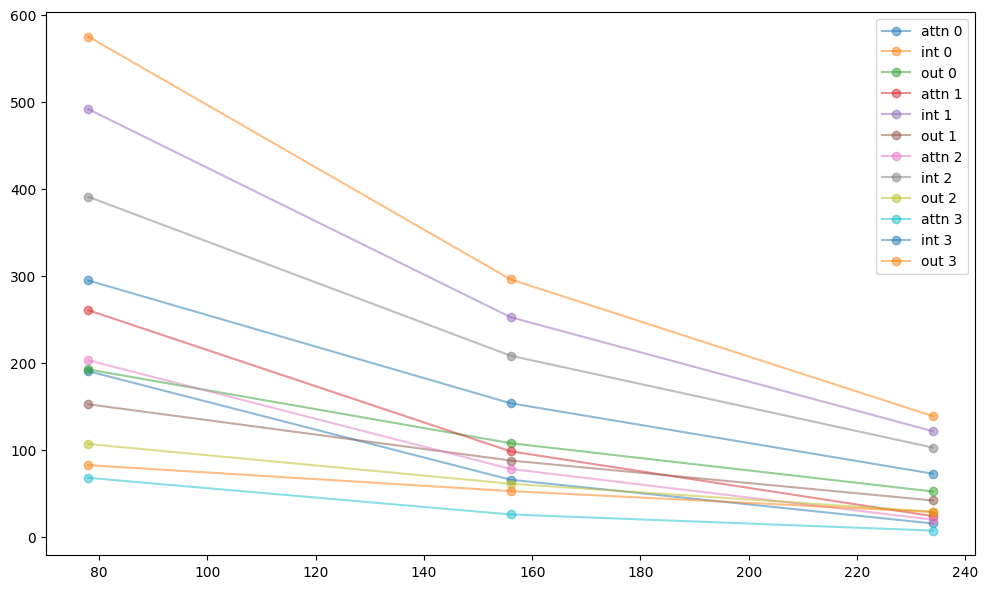

In [36]:
# Plotting Error
xs = [78, 156, 234]
attention_FF_0 = [190.451, 65.70424, 15.41648]
intermediate_FF_0 = [575.13824, 296.01212, 138.8626]
output_FF_0 = [192.47926, 107.72353, 52.196167]
attention_FF_1 = [260.5502, 98.35158, 23.8403]
intermediate_FF_1 = [491.7002, 252.56229, 121.48562]
output_FF_1 = [152.42218, 87.802284, 41.872692]
attention_FF_2 = [203.00471, 78.11213, 19.787428]
intermediate_FF_2 = [390.9478, 208.2979, 102.63758]
output_FF_2 = [106.7411, 61.089626, 29.031622]
attention_FF_3 = [67.88071, 25.762995, 7.243415]
intermediate_FF_3 = [294.74393, 153.62286, 72.65062]
output_FF_3 = [82.4312, 52.65479, 28.597988]

plt.figure(figsize=(10,6))
plt.plot(xs, attention_FF_0, marker = 'o', alpha = 0.5, label='attn 0')
plt.plot(xs, intermediate_FF_0, marker = 'o', alpha = 0.5, label='int 0')
plt.plot(xs, output_FF_0, marker = 'o', alpha = 0.5, label = 'out 0')
plt.plot(xs, attention_FF_1, marker = 'o', alpha = 0.5, label='attn 1')
plt.plot(xs, intermediate_FF_1, marker = 'o', alpha = 0.5, label = 'int 1')
plt.plot(xs, output_FF_1, marker = 'o', alpha = 0.5, label = 'out 1')
plt.plot(xs, attention_FF_2, marker = 'o', alpha = 0.5, label='attn 2')
plt.plot(xs, intermediate_FF_2, marker = 'o', alpha = 0.5, label='int 2')
plt.plot(xs, output_FF_2, marker = 'o', alpha = 0.5, label = 'out 2')
plt.plot(xs, attention_FF_3, marker = 'o', alpha = 0.5, label = 'attn 3')
plt.plot(xs, intermediate_FF_3, marker = 'o', alpha = 0.5, label = 'int 3')
plt.plot(xs, output_FF_3, marker = 'o', alpha = 0.5, label = 'out 3')
plt.legend()
plt.tight_layout()
plt.show()

In [14]:
# FINAL MODEL - smallest
optimize('attention_FF_0', [78], 78, input_text)
optimize('intermediate_FF_0', [78], 78, input_text)
optimize('output_FF_0', [78], 78, input_text)
optimize('attention_FF_1', [78], 78, input_text)
optimize('intermediate_FF_1', [78], 78, input_text)
optimize('output_FF_1', [78], 78, input_text)
optimize('attention_FF_2', [78], 78, input_text)
optimize('intermediate_FF_2', [78], 78, input_text)
optimize('output_FF_2', [78], 78, input_text)
optimize('attention_FF_3', [78], 78, input_text)
optimize('intermediate_FF_3', [78], 78, input_text)
optimize('output_FF_3', [78], 78, input_text)

78 190.4505
78 535.5342
78 163.5643
78 235.36734
78 439.91745
78 122.543396
78 168.23813
78 327.64795
78 79.24651
78 51.781483
78 238.22845
78 55.79159


In [10]:
# FINAL MODEL - medium
optimize('attention_FF_0', [156], 156, input_text)
optimize('intermediate_FF_0', [156], 156, input_text)
optimize('output_FF_0', [156], 156, input_text)
optimize('attention_FF_1', [156], 156, input_text)
optimize('intermediate_FF_1', [156], 156, input_text)
optimize('output_FF_1', [156], 156, input_text)
optimize('attention_FF_2', [156], 156, input_text)
optimize('intermediate_FF_2', [156], 156, input_text)
optimize('output_FF_2', [156], 156, input_text)
optimize('attention_FF_3', [156], 156, input_text)
optimize('intermediate_FF_3', [156], 156, input_text)
optimize('output_FF_3', [156], 156, input_text)

156 65.7041
156 291.4905
156 101.77836
156 96.80233
156 246.6208
156 82.46049
156 75.37022
156 201.45049
156 56.349686
156 24.257034
156 148.33878
156 47.489704


In [41]:
# FINAL MODEL - selected medium
optimize('attention_FF_0', [78], 78, input_text)
optimize('intermediate_FF_0', [156], 156, input_text)
optimize('output_FF_0', [78], 78, input_text)
optimize('attention_FF_1', [78], 78, input_text)
optimize('intermediate_FF_1', [156], 156, input_text)
optimize('output_FF_1', [78], 78, input_text)
optimize('attention_FF_2', [78], 78, input_text)
optimize('intermediate_FF_2', [156], 156, input_text)
optimize('output_FF_2', [78], 78, input_text)
optimize('attention_FF_3', [78], 78, input_text)
optimize('intermediate_FF_3', [156], 156, input_text)
optimize('output_FF_3', [78], 78, input_text)

78 190.451
156 253.70279
78 185.64282
78 249.67477
156 207.62697
78 144.65482
78 174.47624
156 162.89209
78 95.18783
78 49.473663
156 118.99187
78 70.24364
